<a href="https://colab.research.google.com/github/seungmei/ESAA_23_2/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
train=pd.read_csv("/content/movies_train.csv")
test=pd.read_csv("/content/movies_test.csv")
submission=pd.read_csv("/content/submission.csv")

In [ ]:
#1번 스텝수에 따른 관객수
train_staff=train.loc[:,['num_staff','box_off_num']]
train_staff

,num_staff,box_off_num
0,91,23398
1,387,7072501
2,343,6959083
3,20,217866
4,251,483387
...,...,...
595,510,1475091
596,286,1716438
597,123,2475
598,431,2192525


In [ ]:
train_staff.groupby('num_staff').agg(['count', 'mean'])

box_off_num              
                count          mean
num_staff                          
0                  32  7.805562e+03
1                  15  3.715520e+04
2                  15  3.692873e+04
3                  12  4.034653e+05
4                   7  4.129286e+03
...               ...           ...
683                 1  2.260512e+06
687                 1  7.482180e+06
719                 1  2.192276e+06
868                 1  8.666208e+06
869                 1  1.426277e+07

[296 rows x 2 columns]

In [ ]:
train_staff_box=pd.DataFrame(train_staff.groupby(['num_staff'],as_index=False).mean())
train_staff_box

,num_staff,box_off_num
0,0,7.805562e+03
1,1,3.715520e+04
2,2,3.692873e+04
3,3,4.034653e+05
4,4,4.129286e+03
...,...,...
291,683,2.260512e+06
292,687,7.482180e+06
293,719,2.192276e+06
294,868,8.666208e+06


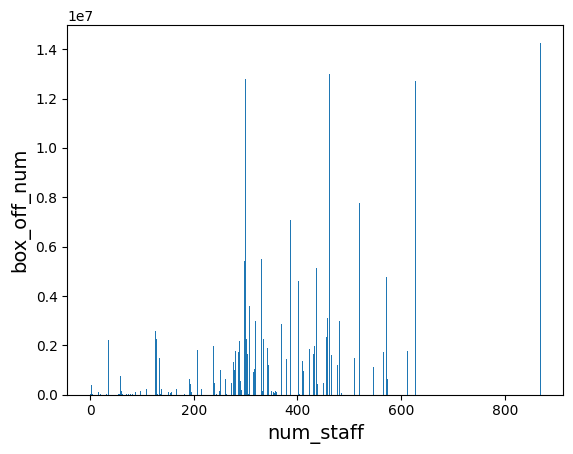

In [ ]:
plt.bar(train_staff_box['num_staff'],train_staff_box['box_off_num'])
plt.xlabel('num_staff', fontsize=14)
plt.ylabel('box_off_num', fontsize=14)
plt.show()

In [ ]:
train_staff_box.corr()
#중상정도의 상관관계를 가진다고 볼 수 있다.

,num_staff,box_off_num
num_staff,1.000000,0.546622
box_off_num,0.546622,1.000000


In [ ]:
#4번 연도별 관객수 top3

train['release_time']=pd.to_datetime(train['release_time'])

In [ ]:
train['release_year']=train['release_time'].dt.year

In [ ]:
train[['release_year','box_off_num']].groupby('release_year').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_year,
2013,1.007358e+06
2012,9.457252e+05
2011,6.288671e+05
2015,5.958692e+05
2014,5.938845e+05
2010,5.416582e+05


In [ ]:
train_year_top3 = train.sort_values(by="box_off_num", ascending=False).groupby("release_year").head(3)
train_year_top3

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766,2014
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841,2012
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435,2013
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663,2015
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595,2012
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,NaN,0,311,5,11374879,2013
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,NaN,0,67,10,9350351,2013
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208,2014
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725,2014
322,히말라야,CJ 엔터테인먼트,드라마,2015-12-16,124,12세 관람가,이석훈,3.549473e+06,4,520,2,7759711,2015


In [ ]:
#10번 상영등급에 따른 영화 시간
[['screening_rat','time']].groupby('screening_rat').mean()

,time
screening_rat,
12세 관람가,101.549020
15세 관람가,106.935644
전체 관람가,89.847826
청소년 관람불가,99.475490


<Axes: xlabel='screening_rat'>

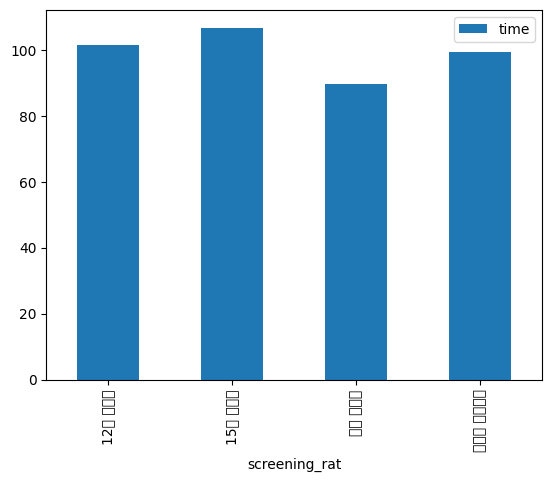

In [ ]:
train[['screening_rat','time']].groupby('screening_rat').mean().plot(kind='bar')

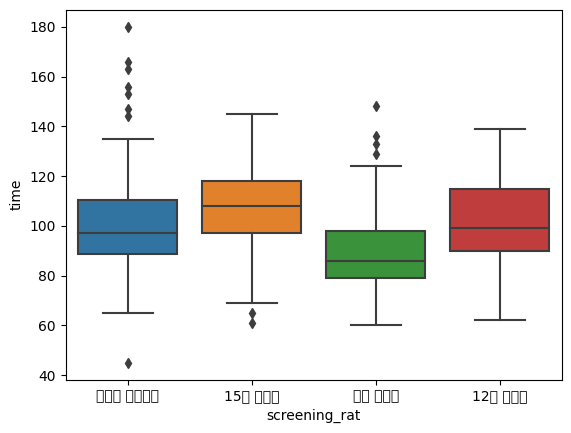

In [ ]:
boxplot=plt.subplots()
boxplot=sns.boxplot(x='screening_rat', y='time', data=train)

In [ ]:
#전체관람가의 경우에 상영시간이 짧다. 어린이가 보는 걸 고려해 영화 시간을 짧게 했다고 예상할 수 있다.